# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Roxana Aranda González Ramírez

- ID: A01613911

- My carreer: ITC


# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans



# PART 1
# Use your assigned dataset

## A1 Load data

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/04SemanaTec/Herramientas computacionales"

else:
    # Define path del proyecto
    Ruta            = ""


Mounted at /content/drive


In [3]:
# Import the packages that we will be using
import pandas as pd

# Dataset url
url = "/datasets/A01613911_X.csv"

# Load the dataset
df = pd.read_csv(Ruta + url)

## A2 Data managment


Print the first 7 rows

In [4]:
df[:7]

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,0,11.770583,6.298509,3.559865,2.464944,2.181993,5.650897,-8.006619,4.541629,8.104777,-5.743923,7.020986,-3.935115,-5.449205,-6.523658
1,1,2.963352,-0.695613,5.294404,7.903555,-1.627726,8.762265,1.512713,-7.848723,-9.736882,-8.085890,2.898554,2.537249,-2.241631,5.720377
2,2,8.888908,4.951926,-1.549475,3.881114,7.582302,-5.114344,-0.970306,-5.611754,2.987396,-2.527854,4.843090,2.109220,4.189517,11.517673
3,3,-7.217669,-10.209498,-0.105223,-0.355960,-2.512300,0.180530,-0.940735,1.497207,-7.566379,2.708510,-5.125273,-1.742944,8.884459,-2.823012
4,4,3.826915,-8.089568,5.396604,2.623423,-7.651400,2.886697,-0.882477,-8.857030,-6.972689,-4.304868,-1.171372,2.081692,-0.937218,9.383340
5,5,-5.037431,-6.409635,3.110268,-1.593618,-0.200130,-2.844980,-1.248332,2.052842,-4.484796,3.162903,-0.611878,-3.297922,8.921154,-4.436564
6,6,6.608776,8.660464,4.795748,0.781339,0.989290,7.126242,-9.781426,4.090757,8.926468,-0.704847,10.870111,3.123783,-1.909974,-8.217605


Print the last 4 rows

In [5]:
df[-4:]

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
319,319,-6.362632,-1.981957,-8.429764,-8.179527,8.606803,-3.389618,-10.468664,0.417673,8.458634,-2.060913,1.668958,2.725141,6.629108,5.235001
320,320,-6.540071,-9.305208,2.207953,-0.893067,-0.202408,1.164240,-7.013224,3.693498,-8.283274,-0.700103,-2.375814,-4.426905,8.461410,-3.841700
321,321,11.178608,4.989986,-0.355585,5.555078,7.227957,-3.152459,-0.183487,-6.701529,10.054497,-0.406488,3.963992,3.851461,5.793071,5.886037
322,322,2.173590,-3.806517,4.220967,5.886828,-8.395413,6.453093,0.818313,-6.983092,-6.069367,-5.050141,-1.626027,-3.115466,-2.637845,8.568709


How many rows and columns are in your data?

Use the `shape` method


In [6]:
df.shape

(323, 15)

Print the name of all columns

Use the `columns` method

In [7]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [8]:
df.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

`Each row is an observation, and each column is a variable. The combination of an observation and a variable, the cels, equals a value in our data.
So we have 323 observations and 15 variables in the dataframe`


Print a statistical summary of your columns


In [9]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,161.000000,-0.779704,1.278701,1.309676,2.484844,-0.161584,0.799434,-3.217267,-2.281464,2.830332,-2.558479,1.826836,1.768223,4.251934,2.774880
std,93.386294,7.977826,6.742881,5.862216,5.064724,7.233399,5.113392,4.848305,5.274674,7.247909,3.188647,4.730700,3.327629,4.342955,6.317081
min,0.000000,-13.212695,-13.654494,-15.159451,-8.676137,-13.748966,-9.909422,-13.949356,-13.545448,-15.298268,-10.288316,-10.729966,-5.486936,-5.550313,-9.526593
25%,80.500000,-8.131056,-3.709286,-1.099917,-1.615845,-7.296406,-3.184719,-7.667019,-6.763285,-4.939551,-4.887697,-0.898791,-0.902958,0.702038,-3.539877
50%,161.000000,-2.877495,2.343979,2.313551,3.145535,-0.402628,-1.132794,-2.468159,-2.230945,6.366875,-2.775573,1.459501,1.687608,5.099658,4.925609
75%,241.500000,7.884015,6.659384,5.846234,5.647403,7.159258,5.676377,0.785860,2.300636,8.518010,-0.332105,4.563481,4.475199,7.687865,8.062148
max,322.000000,13.916659,15.309432,10.986373,14.764223,13.190566,12.801426,7.012509,9.214798,12.917498,5.567488,13.602137,10.089596,12.374814,14.278799


**1) What is the minumum and maximum values of each variable**
- The minimum value is in a range of `-15` and `-5`, depending on the variable we are referring to, for example in `x5` the minimum is `-13.74`.
- The maximum value of the columns, varies between `5` and `15`, for example for `x10` the maximum value is `5.56`.

**2) What is the mean and standar deviation of each variable**
- The mean of all the variables, is around `-1` and `4.5`, so it depends on the column we are looking but for all are a relatively small value. For `x1` is around `-0.77`.
- The standar deviation (std), in a range of `3` and `7`. For `x7` the std is ` 4.84` almost 5.

**3) What the 25%, 50% and 75% represent?**

25% (First Quartile, Q1): It is the median of the lower half of the dataset. It gives an idea of the lower spread of the data. As we see on the description of the data the lower spread is mainly negative, so it means it goes up the more data we have.

50% (Median, Q2): This is the middle value of the dataset, representing the point below which 50% of the data falls.

75% (Third Quartile, Q3): It is the median of the upper half of the dataset and provides insight into the upper spread of the data.


Rename the columns using the same name with capital letters

In [10]:
df = df.rename(columns={"x1":"X1","x2":"X2","x3":"X3","x4":"X4","x5":"X5","x6":"X6","x7":"X7","x8":"X8","x9":"X9","x10":"X10","x11":"X11","x12":"X12","x13":"X13","x14":"X14"})
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,0,11.770583,6.298509,3.559865,2.464944,2.181993,5.650897,-8.006619,4.541629,8.104777,-5.743923,7.020986,-3.935115,-5.449205,-6.523658
1,1,2.963352,-0.695613,5.294404,7.903555,-1.627726,8.762265,1.512713,-7.848723,-9.736882,-8.085890,2.898554,2.537249,-2.241631,5.720377
2,2,8.888908,4.951926,-1.549475,3.881114,7.582302,-5.114344,-0.970306,-5.611754,2.987396,-2.527854,4.843090,2.109220,4.189517,11.517673
3,3,-7.217669,-10.209498,-0.105223,-0.355960,-2.512300,0.180530,-0.940735,1.497207,-7.566379,2.708510,-5.125273,-1.742944,8.884459,-2.823012
4,4,3.826915,-8.089568,5.396604,2.623423,-7.651400,2.886697,-0.882477,-8.857030,-6.972689,-4.304868,-1.171372,2.081692,-0.937218,9.383340


Rename the columns to their original names

In [11]:
df = df.rename(columns={"X1":"x1","X2":"x2","X3":"x3","X4":"x4","X5":"x5","X6":"x6","X7":"x7","X8":"x8","X9":"x9","X10":"x10","X11":"x11","X12":"x12","X13":"x13","X14":"x14"})
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,0,11.770583,6.298509,3.559865,2.464944,2.181993,5.650897,-8.006619,4.541629,8.104777,-5.743923,7.020986,-3.935115,-5.449205,-6.523658
1,1,2.963352,-0.695613,5.294404,7.903555,-1.627726,8.762265,1.512713,-7.848723,-9.736882,-8.085890,2.898554,2.537249,-2.241631,5.720377
2,2,8.888908,4.951926,-1.549475,3.881114,7.582302,-5.114344,-0.970306,-5.611754,2.987396,-2.527854,4.843090,2.109220,4.189517,11.517673
3,3,-7.217669,-10.209498,-0.105223,-0.355960,-2.512300,0.180530,-0.940735,1.497207,-7.566379,2.708510,-5.125273,-1.742944,8.884459,-2.823012
4,4,3.826915,-8.089568,5.396604,2.623423,-7.651400,2.886697,-0.882477,-8.857030,-6.972689,-4.304868,-1.171372,2.081692,-0.937218,9.383340


Use two different alternatives to get one of the columns

In [12]:
#Opcion 1
df.x5

,x5
0,2.181993
1,-1.627726
2,7.582302
3,-2.512300
4,-7.651400
...,...
318,-8.452293
319,8.606803
320,-0.202408
321,7.227957


In [13]:
#Opcion 2
df["x5"]

,x5
0,2.181993
1,-1.627726
2,7.582302
3,-2.512300
4,-7.651400
...,...
318,-8.452293
319,8.606803
320,-0.202408
321,7.227957


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [14]:
df.iloc[62:73,1:3]

,x1,x2
62,-8.914973,5.055450
63,-6.034752,0.790898
64,-6.418929,-0.210477
65,13.006170,3.324834
66,-7.920879,15.309432
67,9.594418,4.750224
68,9.339649,5.108835
69,5.924186,3.049681
70,11.786479,4.853936
71,8.343682,5.746370


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [15]:
#number of null values
df.iloc[:,1:3].isnull().sum()

,0
x1,0
x2,0


In [16]:
#number of not null values
df.iloc[:,1:3].notnull().sum()

,0
x1,323
x2,323


Discard the last column


In [17]:
df = df.drop(columns="x14")


### Questions

Based on the previos results, provide a description of yout dataset

Your response:

In the data, there's no null values, so the outcome of the exploration and handling of them will come out for the most part attached to reality; also the values go from negative up till positive numbers, there's not much a factor of sequence and can really variate, from one observation to another.




## A3 Data visualization

Plot in the same figure the histogram of two variables



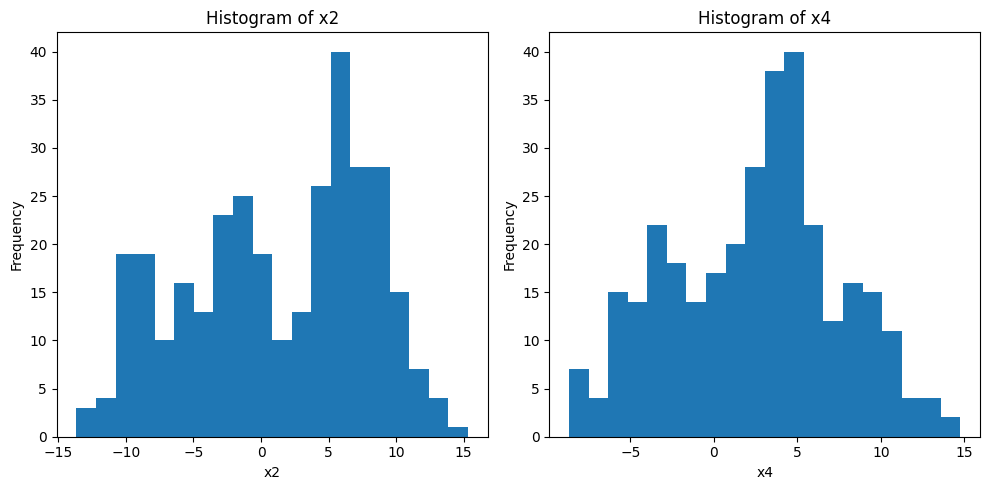

In [18]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['x2'], bins=20)
plt.title('Histogram of x2')
plt.xlabel('x2')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['x4'], bins=20)
plt.title('Histogram of x4')
plt.xlabel('x4')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Based on these plots, provide a description of your data:

Your response here:

In the graph, there is a value around 5 that appears significantly higher than the others, suggesting that something might be affecting it. Additionally, at around 15, the data seems to level off or end, indicating a possible limit or conclusion of the observed trend.

# Plot in the same figure the boxplot of two variables

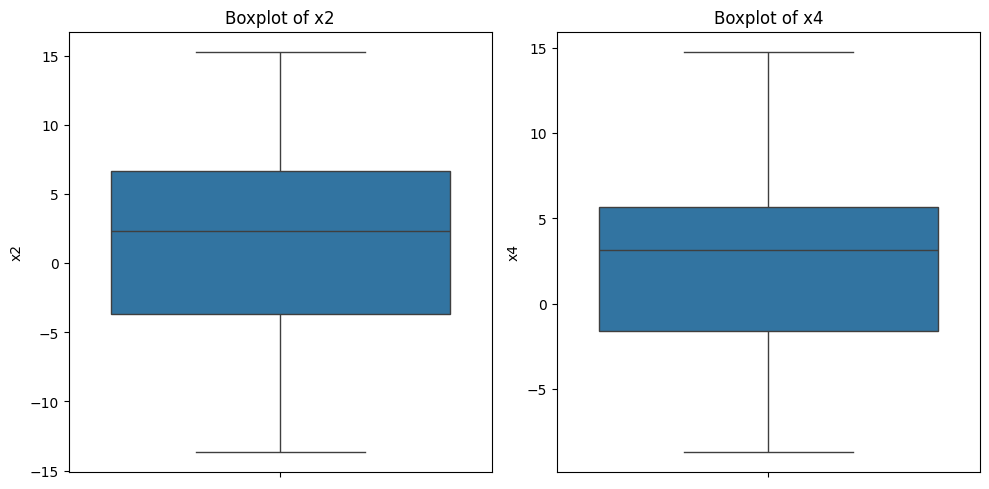

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['x2'])
plt.title('Boxplot of x2')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['x4'])
plt.title('Boxplot of x4')

plt.tight_layout()
plt.show()


Plot the scatter plot of two variables

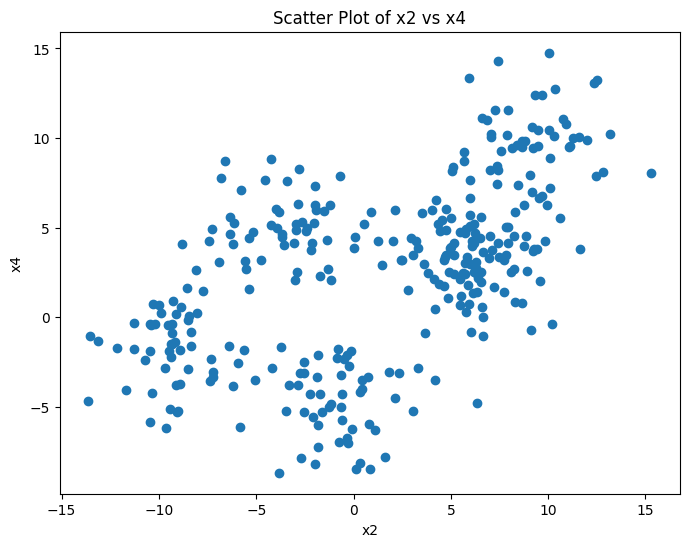

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x2'], df['x4'])
plt.xlabel('x2')
plt.ylabel('x4')
plt.title('Scatter Plot of x2 vs x4')
plt.show()


### Questions

Based on the previos plots, provide a description of yout dataset

Your response:

In the scatter plot, there are approximately 3 clusters of points where the data is concentrated, which will serve as the basis for the KMeans clustering. Additionally, in the box plot, the data ranges from -15 to 15, with a central tendency around 5.


## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [41]:
X = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13']].values

# Define number of clusters
k=3
km = KMeans(n_clusters=k, n_init='auto', random_state=42)

# Do K-means clustering (assing each point in the dataset to a cluster)
km.fit_predict(X)

# Print estimated cluster of each point in the dataset
clusters = km.labels_
print("Cluster assignments:", clusters)

Cluster assignments: [2 1 2 1 1 1 2 2 1 1 2 1 2 1 1 0 2 2 2 1 1 1 2 0 2 0 1 1 1 2 1 1 2 1 2 0 2
 1 1 2 1 1 1 0 2 2 0 1 1 1 1 2 1 1 1 1 1 2 0 0 1 1 0 1 1 2 0 2 2 2 2 2 0 2
 1 2 2 2 1 1 0 2 2 0 1 2 2 2 2 1 1 1 1 0 1 1 0 2 2 0 1 1 1 0 1 2 1 1 1 1 0
 2 2 2 2 1 1 0 1 2 0 2 1 1 2 1 0 1 1 1 2 0 1 1 0 1 2 0 0 0 0 2 0 1 1 1 1 0
 1 0 2 1 0 1 0 2 1 2 1 1 0 1 1 0 2 1 1 2 0 1 1 1 0 1 1 2 1 1 0 1 2 0 1 2 1
 2 2 1 2 1 2 2 2 2 1 2 1 1 1 1 1 1 2 2 1 2 2 2 1 1 1 1 0 1 1 0 1 1 2 0 2 1
 1 1 1 2 2 2 1 1 1 1 2 1 1 0 2 0 1 1 1 1 0 1 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2
 1 0 1 1 1 2 1 1 0 2 2 1 1 2 2 1 1 2 1 2 2 1 1 1 0 2 2 1 2 2 1 2 2 2 1 1 1
 1 1 0 0 1 2 1 2 0 1 2 2 2 1 2 1 1 1 2 2 0 0 0 1 1 2 1]


Add to your dataset a column with the estimated cluster to each data point

In [30]:
data_cluster = df.copy()
data_cluster['cluster'] = clusters
data_cluster.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,cluster
0,0,11.770583,6.298509,3.559865,2.464944,2.181993,5.650897,-8.006619,4.541629,8.104777,-5.743923,7.020986,-3.935115,-5.449205,2
1,1,2.963352,-0.695613,5.294404,7.903555,-1.627726,8.762265,1.512713,-7.848723,-9.736882,-8.085890,2.898554,2.537249,-2.241631,1
2,2,8.888908,4.951926,-1.549475,3.881114,7.582302,-5.114344,-0.970306,-5.611754,2.987396,-2.527854,4.843090,2.109220,4.189517,2
3,3,-7.217669,-10.209498,-0.105223,-0.355960,-2.512300,0.180530,-0.940735,1.497207,-7.566379,2.708510,-5.125273,-1.742944,8.884459,1
4,4,3.826915,-8.089568,5.396604,2.623423,-7.651400,2.886697,-0.882477,-8.857030,-6.972689,-4.304868,-1.171372,2.081692,-0.937218,1


Print the number associated to each cluster

In [31]:
print(data_cluster['cluster'].value_counts())


cluster
1    162
2    108
0     53
Name: count, dtype: int64


Print the centroids

In [32]:
centroids = km.cluster_centers_
print("Centroids:")
print(centroids)

Centroids:
[[-8.51476907  9.33015023  5.76323628  9.77114853 -9.0004907  -3.13493643
   1.40026871 -7.82439792  7.60915709 -4.8479483   0.92221078  4.04104707
   6.42991023]
 [-4.86560013 -4.49373583 -0.82410587 -0.50453328 -0.14629154  1.27900015
  -4.29533739 -1.22864906 -2.19062258 -1.6629025  -1.24761888  1.16278961
   5.69150516]
 [ 9.14505256  5.98618306  2.32480654  3.39322456  4.1530899   2.01084149
  -3.86617283 -1.14054354  8.01659956 -2.77830896  6.88245475  1.56100525
   1.02375601]]


Print the intertia metric

In [42]:
print("Inertia:", km.inertia_)


Inertia: 73819.66341200245


# Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

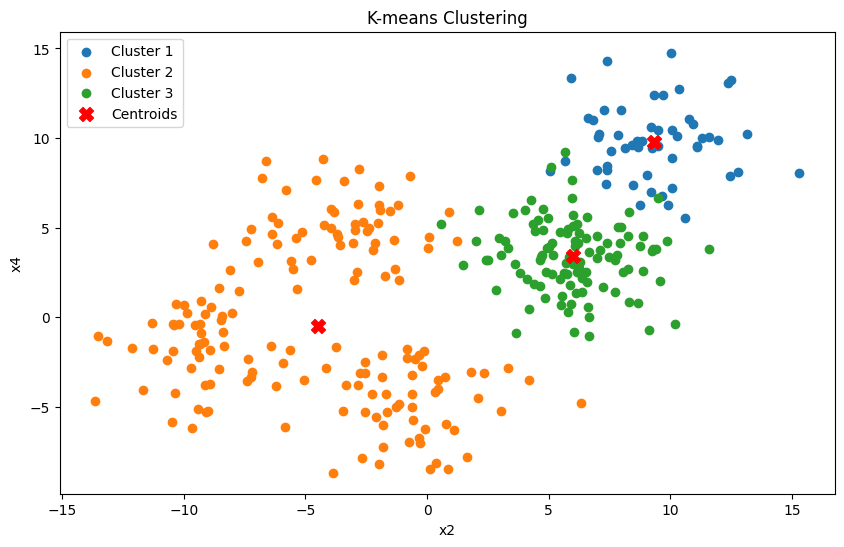

In [46]:
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = data_cluster[data_cluster['cluster'] == i]
    plt.scatter(cluster_data['x2'], cluster_data['x4'], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 1], centroids[:, 3], s=100, c='red', marker='X', label='Centroids')

plt.xlabel('x2')
plt.ylabel('x4')
plt.title('K-means Clustering')
plt.legend()
plt.show()


### Questions

Provides a detailed description of your results

Your response:

In the results of the clustering, we observe that the 3 focal points we chose were an excellent decision, as the centroids on the graph are well-adjusted and accurately represent the clusters. Additionally, the inertia metric shows a pretty acceptable value, indicating good cohesion within the clusters.
Also, if we start to add more centroids, the dispersion within them loses a little bit of consistency.

## A5 Elbow plot

Compute the Elbow plot

In [27]:
sse = []

# Define values of k to test
k_values = range(1, 11)  # For example, test k from 1 to 10

# For each k
for k in k_values:
    # Initialize KMeans with the current k
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)

    # Fit the model
    km.fit(df)

    # Calculate the sum of squared errors (SSE)
    sse.append(km.inertia_)

# Print the SSE values for each k
for k, error in zip(k_values, sse):
    print(f'k={k}, SSE={error}')

k=1, SSE=2941450.614201804
k=2, SSE=834790.0473470109
k=3, SSE=444230.4270964993
k=4, SSE=307251.5068683746
k=5, SSE=243666.16118825704
k=6, SSE=209442.40414428958
k=7, SSE=187048.53450575593
k=8, SSE=173586.69848156456
k=9, SSE=167353.81246345333
k=10, SSE=157443.1711376932


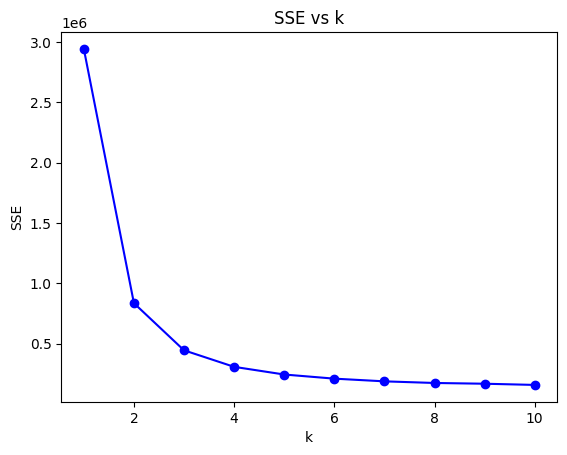

In [48]:
# Plot sse versus k
plt.plot(k_values,sse, c='blue', marker='o')

plt.title('SSE vs k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### Questions

**What is the best number of clusters K? (argue your response)**

Your response:

The optimal number of clusters is 3, as the decrease in inertia is more significant when moving from 2 to 3 clusters compared to the decrease from 3 to 4 clusters. This suggests that the separation of the data points will be more compact and meaningful with 3 clusters.


---

**Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)**

Your response:

Yes, the selected number of clusters aligns with our initial guess. The analysis confirms that 3 clusters are indeed optimal, as the reduction in inertia from 2 to 3 clusters is more pronounced, supporting our initial assessment.


# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

He logrado entender las interacciones entre variables relevantes en un problema, lo que me ha permitido construir modelos bivariados efectivos basados en datos. Aunque hubo partes que me resultaron desafiantes, logré superar esas dificultades y avanzar en la comprensión del fenómeno investigado.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

A través de un análisis detallado y la aplicación de técnicas adecuadas, he desarrollado modelos que capturan las relaciones entre las variables y proporcionan una representación precisa del fenómeno investigado.
Para poder comprender la relación de variables en un fenómeno, y utilizarlo para algoritmos de machine learning.